In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set()
import numpy as np
from scipy import signal

In [2]:
df = pd.read_csv('seg_004314.csv')
df.head(5)

,acoustic_data
0,6
1,6
2,9
3,5
4,5


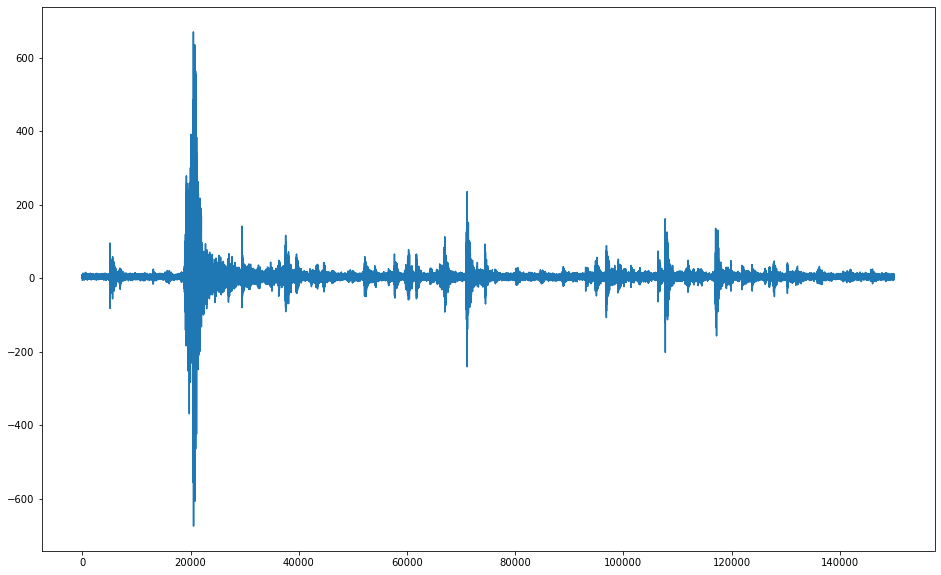

In [3]:
fig, ax = plt.subplots(1, figsize = (16, 10))
ax.plot(df.index.values, df.acoustic_data)
plt.show()


In [4]:
windows = [10, 50, 100, 200]
for window in windows:
    df['rolling_mean_{}'.format(window)] = df['acoustic_data'].rolling(window).mean()
    df['rolling_std_{}'.format(window)] = df['acoustic_data'].rolling(window).std()
df.tail()

,acoustic_data,rolling_mean_10,rolling_std_10,rolling_mean_50,rolling_std_50,rolling_mean_100,rolling_std_100,rolling_mean_200,rolling_std_200
149995,1,2.2,3.047768,3.52,4.126767,3.24,3.547997,3.490,3.143135
149996,4,2.2,3.047768,3.62,4.075261,3.24,3.547997,3.470,3.126978
149997,10,2.5,3.659083,3.84,4.117459,3.34,3.596351,3.525,3.144649
149998,4,2.4,3.596294,3.88,4.108925,3.35,3.596786,3.555,3.120201
149999,2,2.4,3.596294,3.84,4.117459,3.39,3.558728,3.560,3.116885


In [5]:
dfsample = df.iloc[15000 : 30000, :]

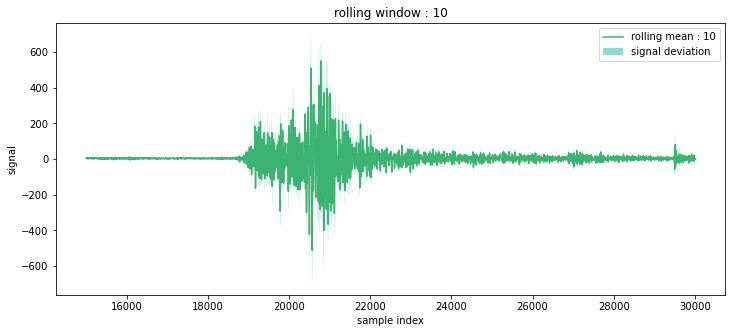

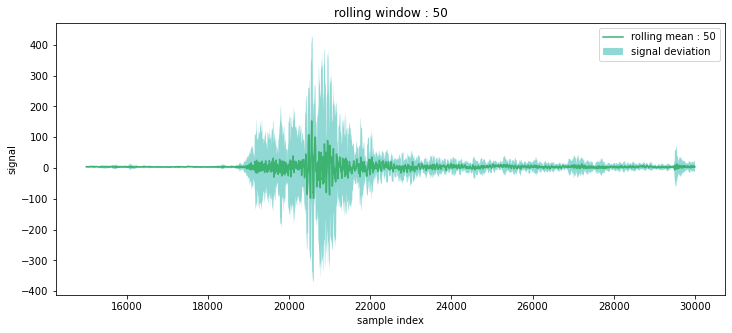

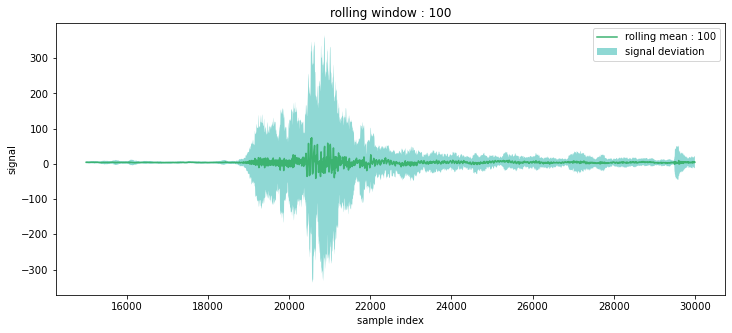

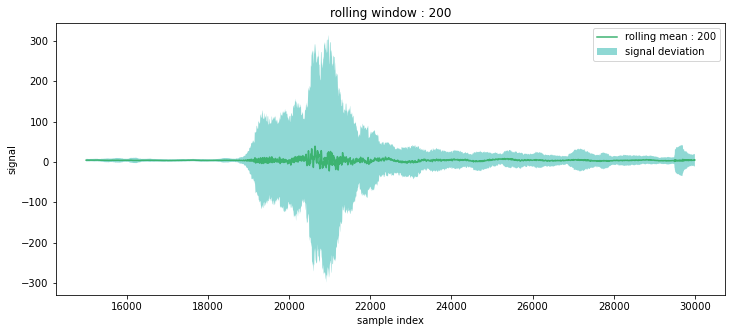

In [6]:
for i, window in enumerate(windows):
    upperbound = dfsample['rolling_mean_{}'.format(window)] + dfsample['rolling_std_{}'.format(window)]    
    lowerbound = dfsample['rolling_mean_{}'.format(window)] - dfsample['rolling_std_{}'.format(window)]
    plt.figure(figsize = (12, 5))
    plt.fill_between(dfsample.index.values, upperbound, lowerbound, facecolor = 'lightseagreen', alpha = 0.5)
    plt.plot(dfsample.index.values, dfsample['rolling_mean_{}'.format(window)], color = 'mediumseagreen')
    plt.title('rolling window : {}'.format(window))
    plt.xlabel('sample index')
    plt.ylabel('signal')
    plt.legend(['rolling mean : {}'.format(window), 'signal deviation'])
    plt.show()

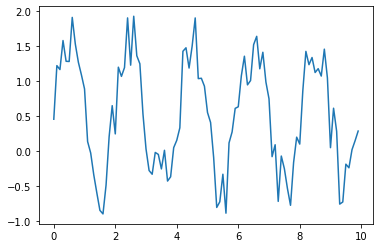

100


In [7]:
t = np.arange(0, 10, 0.1)
err = np.random.rand(t.shape[0])
sig = np.sin(2*np.pi*0.5*t) + err
plt.plot(t, sig)
plt.show()
print(len(sig))

pp_sig 114


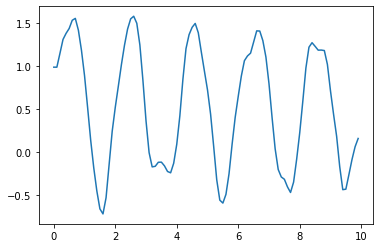

In [8]:
window_len = 8
pp_sig = np.r_[sig[window_len -1 : 0 : -1], sig, sig[-2 : -window_len - 1 : -1]]
print('pp_sig', len(pp_sig))
w = np.blackman(window_len)
oo = np.convolve(w / w.sum(), pp_sig, mode = 'valid')
start = int(window_len / 2 - 1)
end = - int(window_len / 2)
out = oo[start: end]
len(out)
plt.plot(t, out)

In [9]:
x = np.arange(10)
window = 3
c = np.r_[x[window - 1 : 0 : -1 ], x, x[-2 : -window - 1 : -1]]
print('c', len(c))
ww = np.blackman(window)
oo = np.convolve(ww / ww.sum(), x, mode = 'valid')
len(oo)

c 14


8

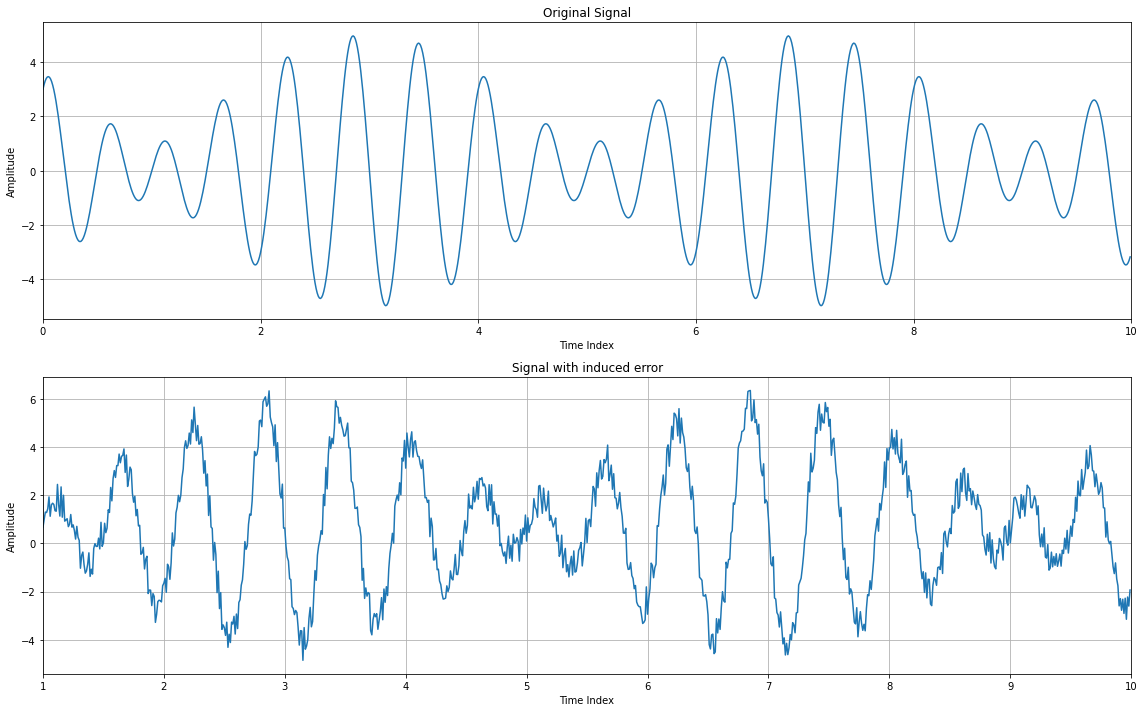

In [10]:
t = np.arange(0, 10, 0.01)
err = np.random.rand(t.shape[0])
orig_signal = 2 *np.sin(2 * np.pi * 1.5 * t) + 3 * np.cos(2 * np.pi * 1.75 * t)
signal = orig_signal + err * 1.5
fig, ax = plt.subplots(nrows = 2, figsize = (16, 10))
ax[0].plot(t, orig_signal)
ax[0].set_title('Original Signal')
ax[0].set_xlabel("Time Index")
ax[0].set_ylabel('Amplitude')
ax[0].grid()
ax[0].set_xlim(0, 10)
ax[1].plot(t, signal)
ax[1].set_title('Signal with induced error')
ax[1].set_xlabel("Time Index")
ax[1].set_ylabel('Amplitude')
ax[1].grid()
ax[1].set_xlim(1, 10)
fig.tight_layout()
plt.show()

Text(0.5, 1.0, 'Windows')

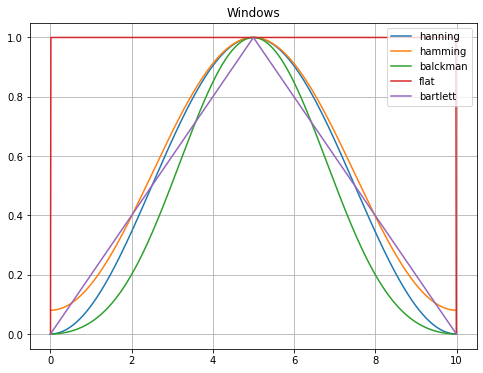

In [11]:
#Different window functions 
window_len = 1000
t =t
hanning = np.hanning(window_len)
hamming = np.hamming(window_len)
blackman = np.blackman(window_len)
flat = np.r_[[0], np.ones(window_len-2), [0]]
bartlett = np.bartlett(window_len)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
ax.plot(t, hanning, label = 'hanning')
ax.plot(t, hamming, label = 'hamming')
ax.plot(t, blackman, label = 'balckman')
ax.plot(t, flat, label = 'flat')
ax.plot(t, bartlett, label = 'bartlett')
ax.legend(loc = 1)
ax.grid()
ax.set_title('Windows')

In [12]:
def convolute_signal(sig, window, window_len):
    '''fuction to convolute signal with the desired window type
    wiht the desired length to smoothen it
    sig : the signal observations as an array
    window : window type in string
             valid inputs : flat, hanning, hamming, blackman, bartlett
    window_len : length of the window
                  must be odd 
                  if odd, will be rounded to nearest greater even integer'''
    
    if window_len % 2 == 0:
        window_len += 1
        
    #signal padding to reduce the loss at the beginig and the end
    preprocessed_signal = np.r_[sig[window_len - 1 : 0 : -1], sig, sig[-2 : -window_len - 1 : -1]]
    
    #initializing window as per the request
    if window == "flat":
        w = np.ones(window_len)
    else:
        w = eval('np.'+window+'(window_len)')
        
    #convoluting the window and the signal
    out = np.convolve(w / w.sum(), preprocessed_signal, mode = 'valid')
    
    #adjuating the output to the length of the input
    start = int(window_len/2)
    end = - int(window_len/2)
    smooth_signal = out[start : end]
    return smooth_signal
        

In [13]:
y = convolute_signal(signal, 'blackman', 51)
len(y)

1000

(0.0, 10.0)

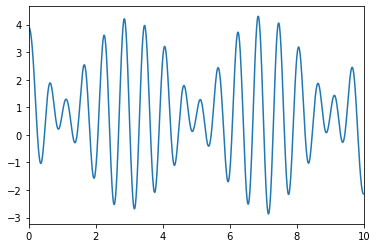

In [14]:
plt.plot(t, y)
plt.xlim(0, 10)

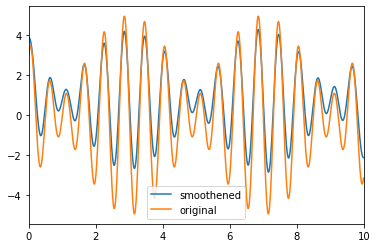

In [15]:
plt.plot(t, y, label = 'smoothened')
plt.plot(t, orig_signal, label = 'original')
plt.xlim(0, 10)
plt.legend()

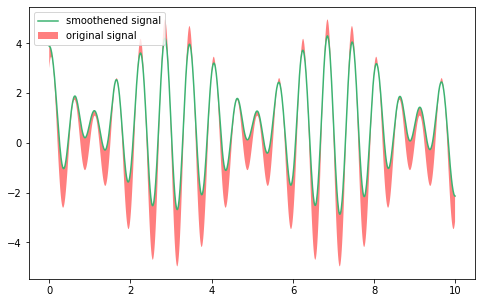

In [16]:
plt.figure(figsize = (8, 5))
plt.fill_between(t, orig_signal, y, facecolor = 'red', alpha = 0.5, label = 'original signal')
plt.plot(t, y, color = 'mediumseagreen', label = 'smoothened signal')
plt.legend(loc = 2)
plt.show()

In [17]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

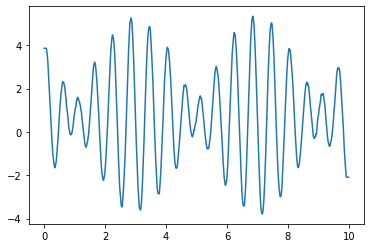

In [18]:
X = t[:, np.newaxis]
y = signal
regressor = KNeighborsRegressor(n_neighbors = 15, weights = 'uniform')
regressor.fit(X, y)
signal_pred = regressor.predict(X)
plt.plot(t, signal_pred)
plt.show()

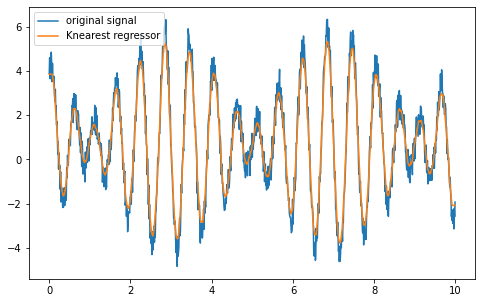

In [19]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(t, signal, label = 'original signal')
ax.plot(t, signal_pred, label = 'Knearest regressor')
ax.legend()
plt.show()

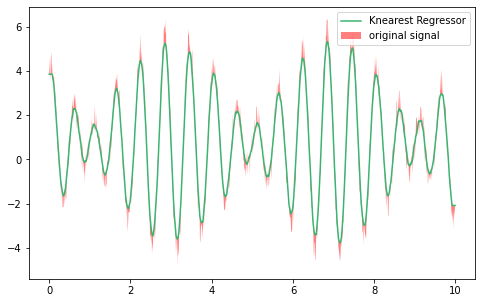

In [20]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.fill_between(t, signal, signal_pred, facecolor = 'red', alpha = 0.5, label = 'original signal')
ax.plot(t, signal_pred, label = 'Knearest Regressor', color = 'mediumseagreen')
ax.legend()

ValueError: x and y must have same first dimension, but have shapes (15000,) and (14999,)

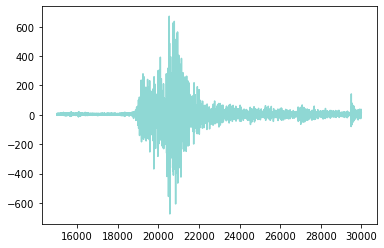

In [21]:
y = convolute_signal(dfsample.acoustic_data, 'blackman', 50)
plt.plot(dfsample.index.values, dfsample.acoustic_data, color = 'lightseagreen', alpha = 0.5)
plt.plot(dfsample.index.values, y, color = 'mediumseagreen')

In [ ]:
X = np.array(dfsample.index.values)
X = X[:, np.newaxis]
y = dfsample.acoustic_data
regressor = KNeighborsRegressor(n_neighbors = 25, weights = 'uniform')
regressor.fit(X, y)
signal_pred = regressor.predict(X)
plt.plot(X, y, color = 'lightseagreen', alpha = 0.5)
plt.plot(X, signal_pred, color = 'mediumseagreen')